In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
from chart_studio import plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
%matplotlib inline
import numpy as np
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
import pandas as pd 
countries_of_interest_df = pd.read_csv("merged_Dataset.csv")


C:\Users\TameemTecnology\AppData\Local\Temp\ipykernel_13596\2711204123.py:11: DtypeWarning:

Columns (147,149,150,151,153,155,156,157) have mixed types. Specify dtype option on import or set low_memory=False.



Helper Functions

In [56]:
#this function will be used to get the total number of people migrated from a country in the given year, if you dont provide the destination country
#then you will get the total number of people migrated from the origin country regarless of the destination country

def col_sum( source, year,gender,age, type, origin_country=None, destination_country = None):
    """
        source : String 
               for dataset from EUROSTAT 'ESTAT'
               for dataset from UN 'UN'
        
        year :String 
                year for the data
        gender : String 
                'T' for both, 
                'M' for Male, 
                'F' for Female
        age : String 
                'T' for all ages, 
                for below 15 '<15', 
                between 15- 64 '15-64',
                above 64 '>64',
        type : String 
               for citizen type migration 'cit',
               for residence type migration 'res'
        origin_country : String 
                name of the origin country
        origin_country: String  
                name of the origin country
        destination_country : 
                String name of the destination country
        
    
    """
    if origin_country and destination_country:
        
        value = countries_of_interest_df[(countries_of_interest_df['origin_name']==origin_country) & (countries_of_interest_df['destination_name']==destination_country)][f'{source}_{year}_{gender}_{age}_{type}'].sum()

    elif origin_country:
        
        value = countries_of_interest_df[(countries_of_interest_df['origin_name']==origin_country)][f'{source}_{year}_{gender}_{age}_{type}'].sum()
    
    return value




In [57]:
#this function with the help of col_sum() function will built a bar graph for a country showing the total number of people, 
#total number of male and total number of female migrated from that country in the time span of 5 years from 2014-2019 for ESTAT
#and from 2015-2019 for UN dataset
def bar_graph_of_country(origin_country, source, type):
    '''
        source : String 
               for dataset from EUROSTAT 'ESTAT'
               for dataset from UN 'UN'
        origin_country: String  
                name of the origin country
        type : String 
               for citizen type migration 'cit',
               for residence type migration 'res'
    '''
    if source == "UN": #for UN we have data for the years 2015-2019
        graph_for_a_country = {'2015':{'Both':col_sum(source, "2015", "T", "T", type, origin_country  ), 'Male':col_sum(source, "2015", "M", "T", type, origin_country  ),'Female': col_sum(source, "2015", "F", "T", type, origin_country  )},
                                                                                    '2016':{'Both':col_sum(source, "2016", "T", "T", type, origin_country  ), 'Male':col_sum(source, "2016", "M", "T", type, origin_country  ),'Female': col_sum(source, "2016", "F", "T", type, origin_country  )},
                                                                                    '2017':{'Both':col_sum(source, "2017", "T", "T", type, origin_country ), 'Male':col_sum(source, "2017", "M", "T", type, origin_country  ),'Female': col_sum(source, "2017", "F", "T", type, origin_country  )},
                                                                                    '2018':{'Both':col_sum(source, "2018", "T", "T", type, origin_country  ), 'Male':col_sum(source, "2018", "M", "T", type, origin_country  ),'Female': col_sum(source, "2018", "F", "T", type, origin_country  )},
                                                                                    '2019':{'Both':col_sum(source, "2019", "T", "T", type, origin_country  ), 'Male':col_sum(source, "2019", "M", "T", type, origin_country  ),'Female': col_sum(source, "2019", "F", "T", type, origin_country )}
                                                                                    }

    else: #for ESTAT we have data for the years 2014-2019
        graph_for_a_country = {'2014':{'Both':col_sum(source, "2014", "T", "T", type, origin_country ), 'Male':col_sum(source, "2014", "M", "T", type, origin_country  ),'Female': col_sum(source, "2014", "F", "T", type, origin_country  )},
                                                                                    '2015':{'Both':col_sum(source, "2015", "T", "T", type, origin_country  ), 'Male':col_sum(source, "2015", "M", "T", type, origin_country  ),'Female': col_sum(source, "2015", "F", "T", type, origin_country  )},
                                                                                    '2016':{'Both':col_sum(source, "2016", "T", "T", type, origin_country  ), 'Male':col_sum(source, "2016", "M", "T", type, origin_country  ),'Female': col_sum(source, "2016", "F", "T", type, origin_country  )},
                                                                                    '2017':{'Both':col_sum(source, "2017", "T", "T", type, origin_country ), 'Male':col_sum(source, "2017", "M", "T", type, origin_country  ),'Female': col_sum(source, "2017", "F", "T", type, origin_country  )},
                                                                                    '2018':{'Both':col_sum(source, "2018", "T", "T", type, origin_country  ), 'Male':col_sum(source, "2018", "M", "T", type, origin_country  ),'Female': col_sum(source, "2018", "F", "T", type, origin_country  )},
                                                                                    '2019':{'Both':col_sum(source, "2019", "T", "T", type, origin_country  ), 'Male':col_sum(source, "2019", "M", "T", type, origin_country  ),'Female': col_sum(source, "2019", "F", "T", type, origin_country )}
                                                                                    }
    
    return graph_for_a_country

    
    

Bar graph showing Male, Female and Both(Male and Female) ratio of the imigrants with residence status in the respective years w.r.t the origin country. The results are for ESTAT dataset.

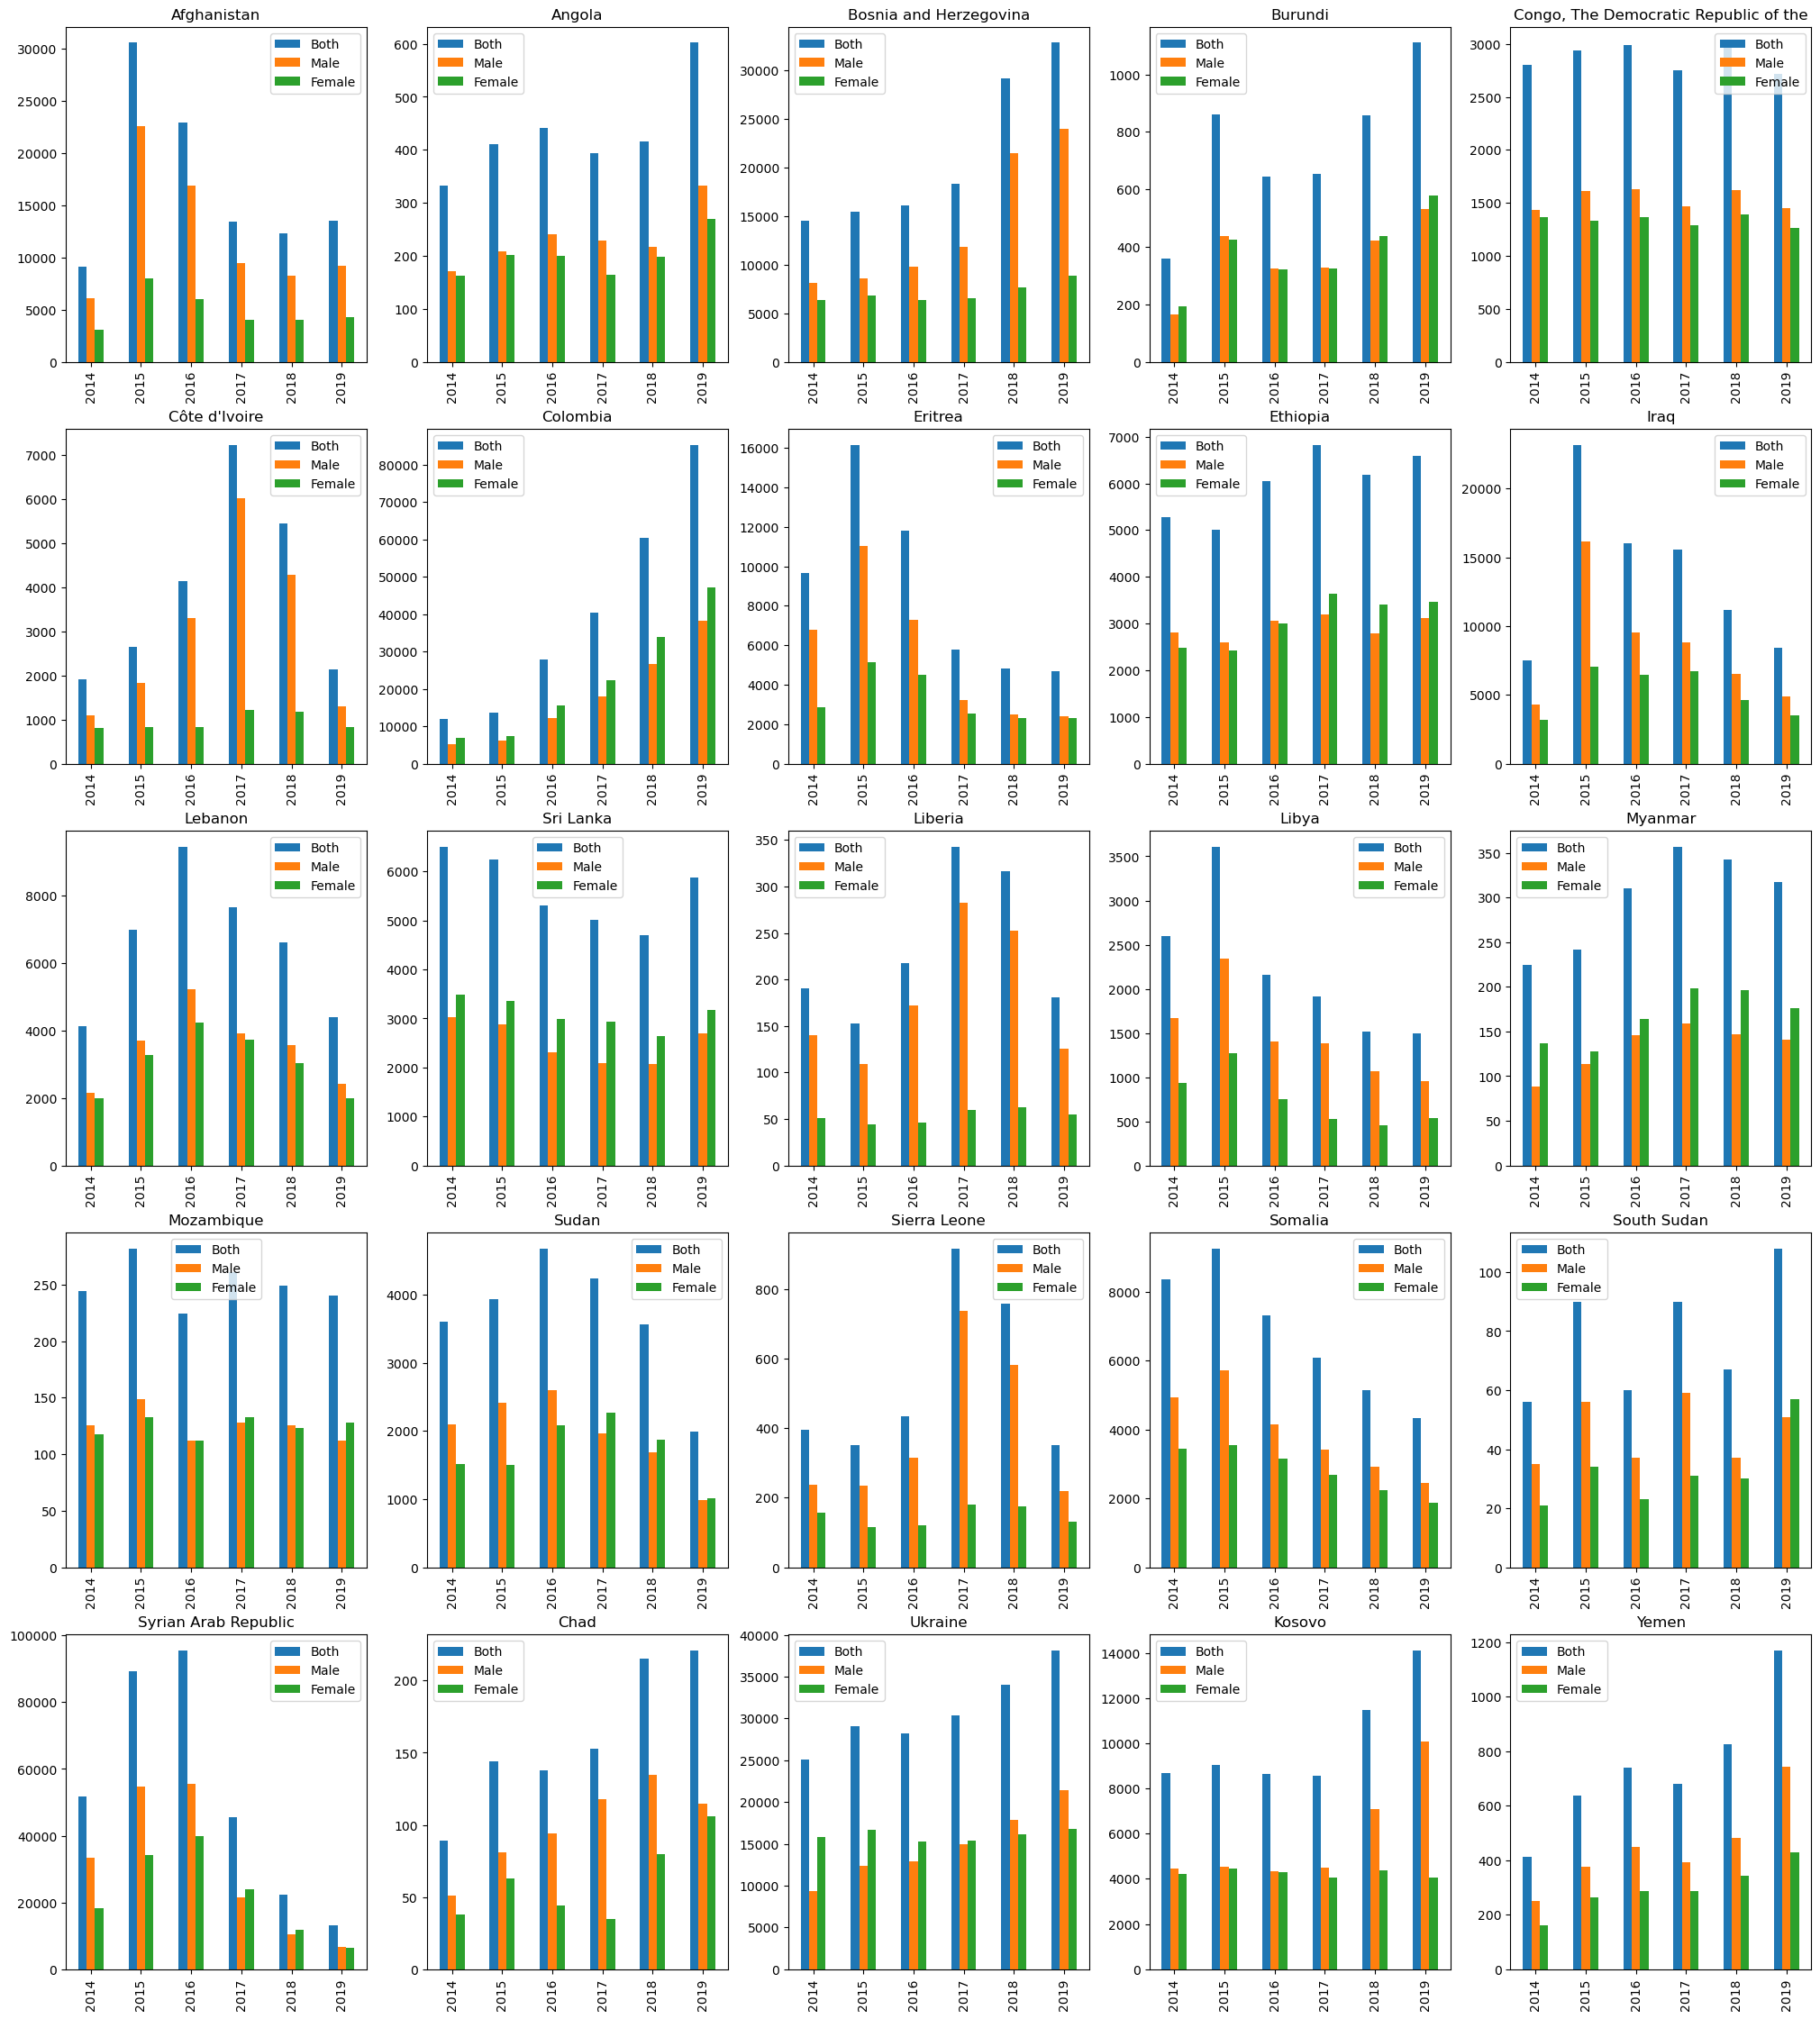

In [58]:

#geting a list of the unique country names
country_names = countries_of_interest_df['origin_name'].unique().tolist()
#dividing the single list into 5 nested lists for convenience for the later part where we will plot graph
country_names = [country_names[i:i+5] for i in range(0, len(country_names), 5)]
fig, axes = plt.subplots(5, 5, figsize=(25,28))
#by making nested lists we can iterated over the country names and also plot the graph at the given axis easily
for i in range(0,5):
    for j in range(0,5):
        graph_for_a_country = bar_graph_of_country(country_names[i][j], "ESTAT", "res")
        x = pd.DataFrame(graph_for_a_country)
        #this is the part where our nested list will come handy, we can use the same i and j indices for axis[i,j] 
        #that we used above to fetch country name
        x.transpose().plot(ax=axes[i,j], kind='bar', title= country_names[i][j])
    






Examining the graph from Euro estate's dataset, it becomes evident that, generally, more men migrate compared to women in various countries. However, there are instances where the migration rate for women slightly exceeds that of men. Notably, in countries such as Sri Lanka, Myanmar, Sudan, Mozambique, Colombia, Ethiopia, and Madagascar, instances occur where women's migration rate surpasses that of men, highlighting significant variations in migration patterns between genders and showcasing distinct trends in specific countries.
By conducting a simple search on the internet to find the reason, we discover that gender disparities in migration are influenced by factors like a preference for societies with gender equality, economic opportunities, and sociocultural elements. Women often migrate independently in search of better work and education, contributing to a more balanced gender representation in migration flows. Stable nations tend to exhibit a more even gender distribution in migration, fostering opportunities for both men and women.
Education and empowerment play key roles in driving female migration, as women seek growth in societies offering these opportunities. Government policies promoting gender equality also shape migration patterns. A comprehensive understanding requires exploration of specific data points, recognizing the complex interplay of economic, social, and political factors in migration dynamics.


Bar graph showing Male, Female and Both(Male and Female) ratio of the imigrants with citizenship status in the respective years w.r.t the origin country. The results are for ESTAT dataset.

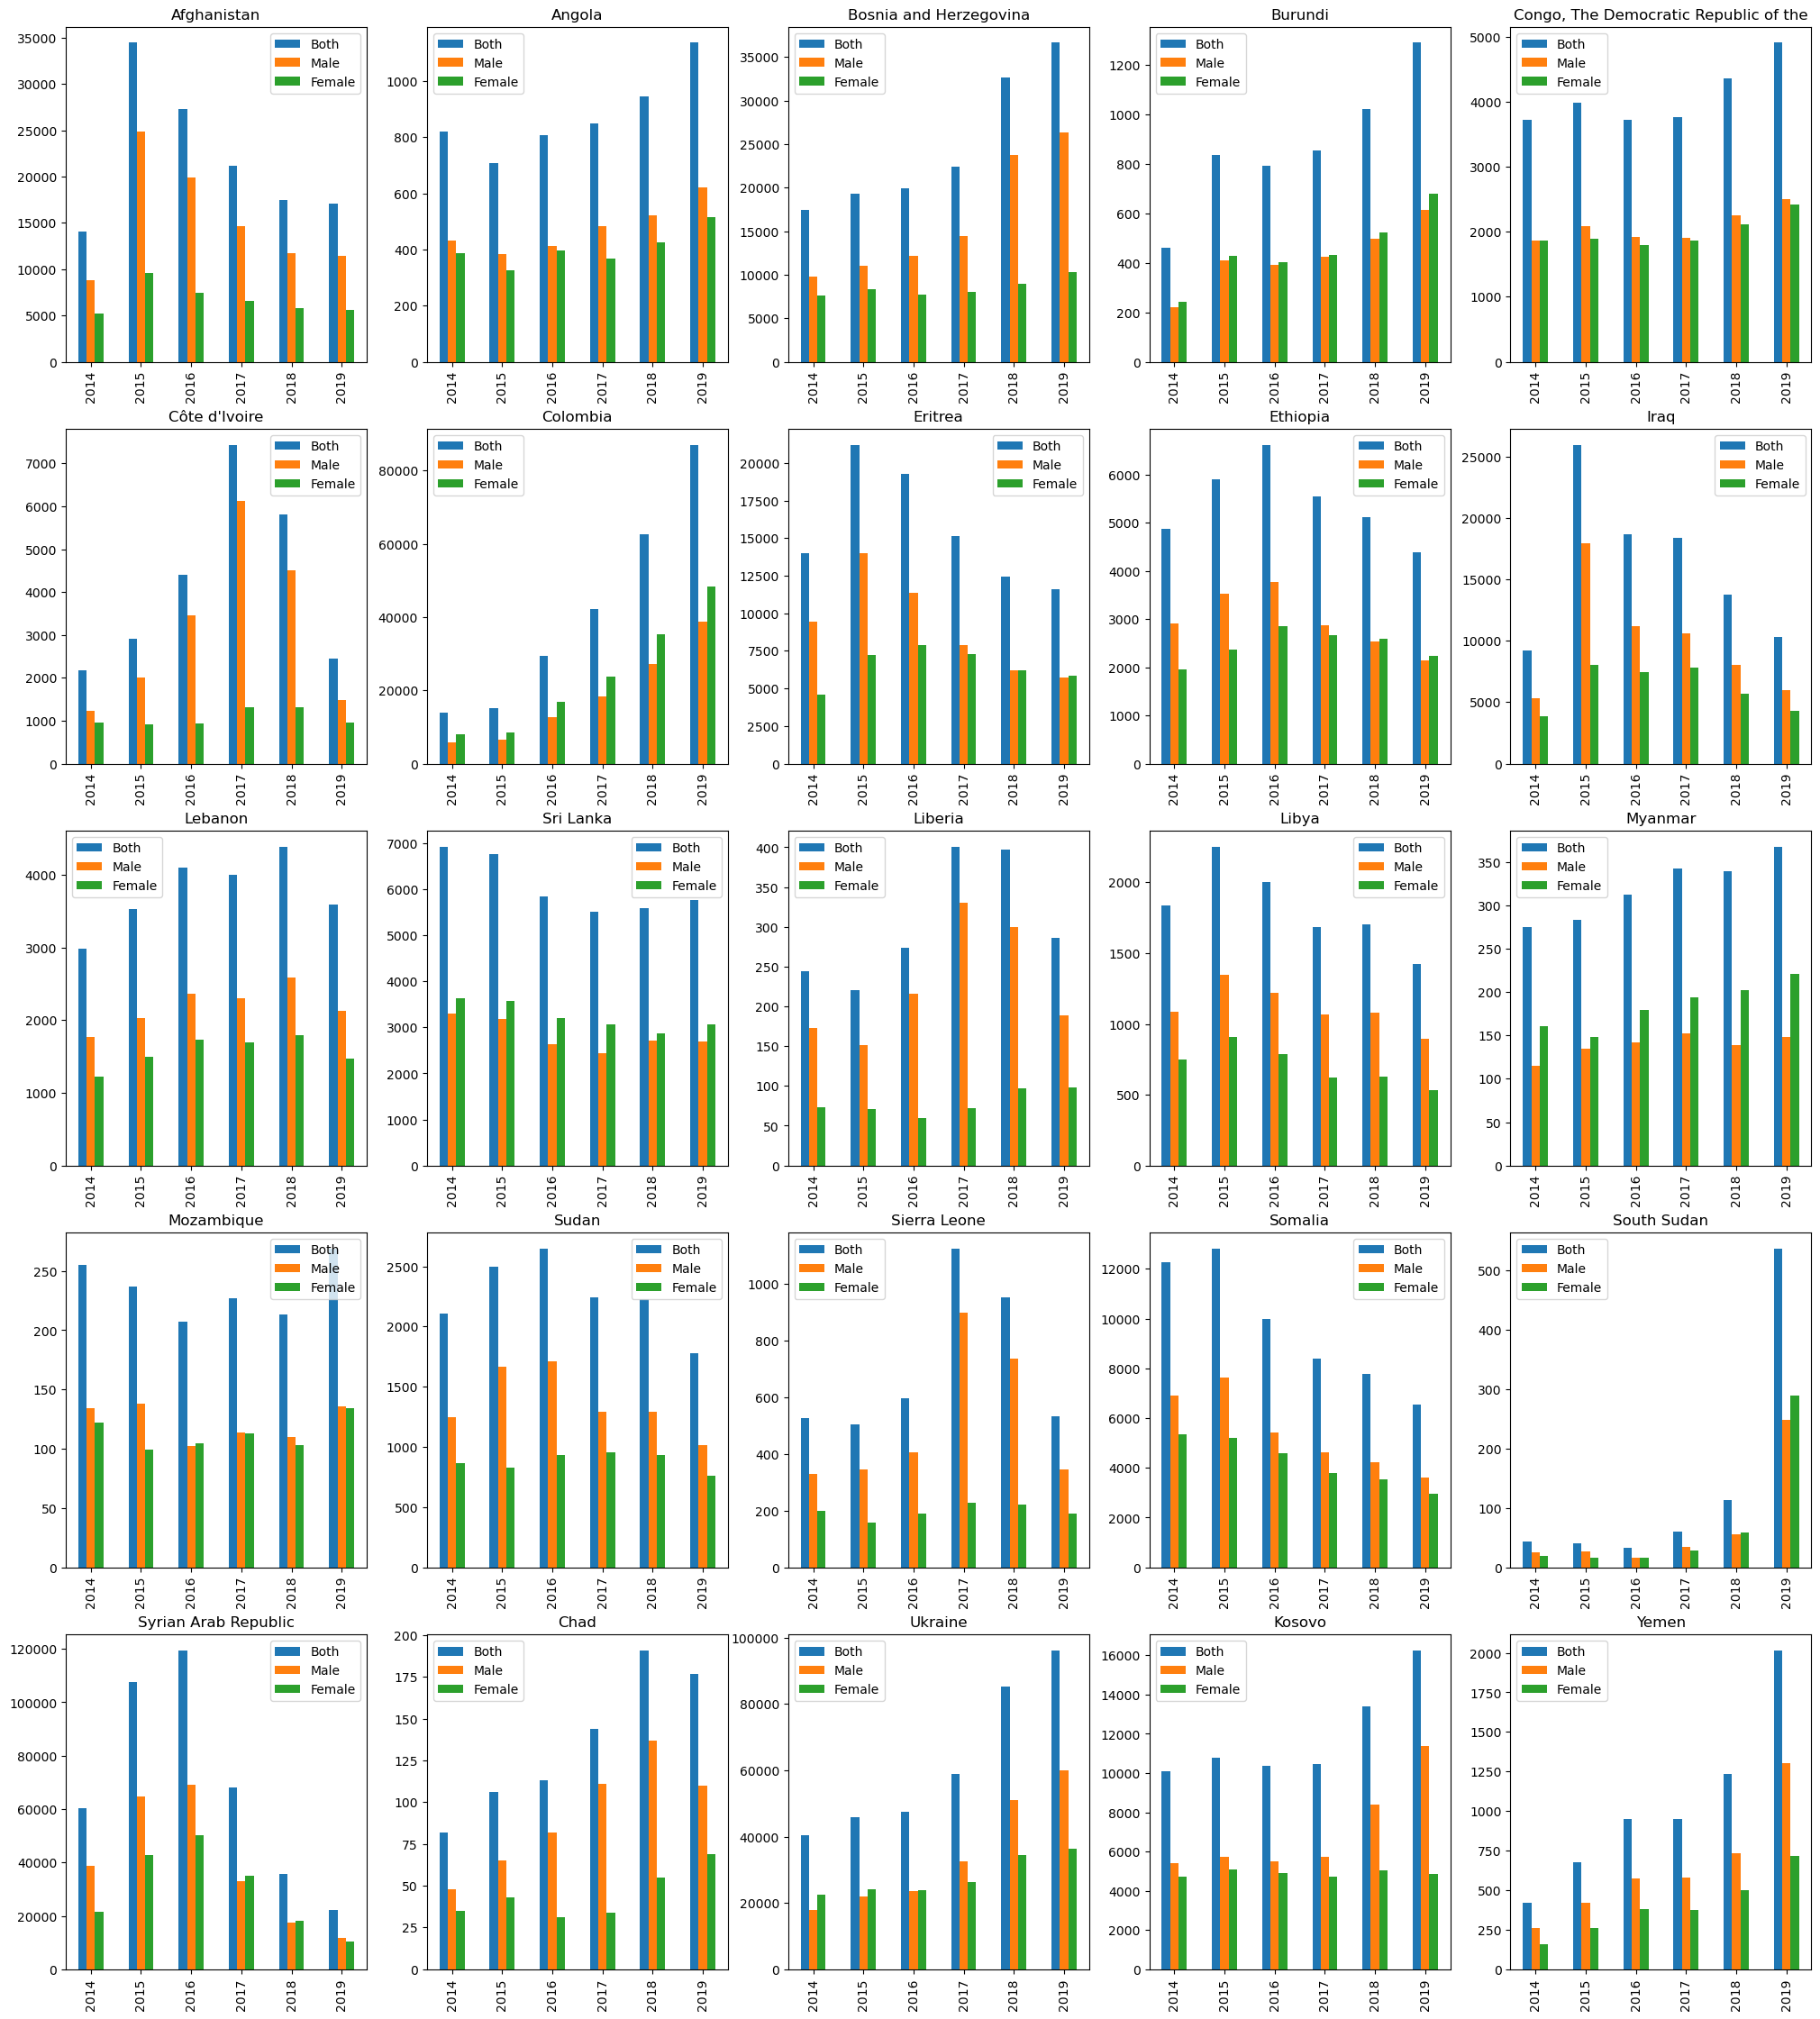

In [59]:
#geting a list of the unique country names
country_names = countries_of_interest_df['origin_name'].unique().tolist()
#dividing the single list into 5 nested lists for convenience for the later part where we will plot graph
country_names = [country_names[i:i+5] for i in range(0, len(country_names), 5)]
fig, axes = plt.subplots(5, 5, figsize=(25,28))
#by making nested lists we can iterated over the country names and also plot the graph at the given axis easily
for i in range(0,5):
    for j in range(0,5):
        graph_for_a_country = bar_graph_of_country(country_names[i][j], "ESTAT", "cit")
        x = pd.DataFrame(graph_for_a_country)
        #this is the part where our nested list will come handy, we can use the same i and j indices for axis[i,j] 
        #that we used above to fetch country name
        x.transpose().plot(ax=axes[i,j], kind='bar', title= country_names[i][j])

```markdown
Additionally, upon scrutinizing the graph, we observed that certain countries experienced a higher number of migrations in specific years. Further research into the reasons behind this phenomenon for each country reveals valuable data.

1. Afghanistan 2015: Increased migration due to persistent security concerns and ongoing conflicts [[6](https://www.elibrary.imf.org/view/book/9781513539744/ch04.xml)].
2. Angola 2019: Escalating political instability and economic challenges fueled higher migration [[6](https://www.elibrary.imf.org/view/book/9781513539744/ch04.xml)].
3. Bosnia and Herzegovina 2019: Rising migration attributed to regional tensions and economic factors [[6](https://www.elibrary.imf.org/view/book/9781513539744/ch04.xml)].
4. Burundi 2019: Heightened migration likely linked to political instability and social unrest [[6](https://www.elibrary.imf.org/view/book/9781513539744/ch04.xml)].
5. Chechnya (part of the conflict in Russia): Ongoing regional conflicts driving migration [[6](https://www.elibrary.imf.org/view/book/9781513539744/ch04.xml)].
6. Colombia 2019: Migration surge influenced by political and economic challenges [[6](https://www.elibrary.imf.org/view/book/9781513539744/ch04.xml)].
7. Democratic Republic of Congo 2019: Political instability and conflict prompted increased migration [[6](https://www.elibrary.imf.org/view/book/9781513539744/ch04.xml)].
8. Eritrea 2015: Migration upsurge amid political repression and limited economic opportunities [[6](https://www.elibrary.imf.org/view/book/9781513539744/ch04.xml)].
9. Ethiopia (various conflicts, including the Ethiopian Civil War) 2016: Escalating conflicts and civil unrest contributing to migration [[6](https://www.elibrary.imf.org/view/book/9781513539744/ch04.xml)].
10. Iraq 2015: Increased migration due to conflicts, security concerns, and economic challenges [[6](https://www.elibrary.imf.org/view/book/9781513539744/ch04.xml)].
11. Ivory Coast (Côte d'Ivoire) 2017: Economic factors and political stability influencing migration patterns [[6](https://www.elibrary.imf.org/view/book/9781513539744/ch04.xml)].
12. Kosovo 2019: Migration rise linked to economic hardships and political tensions [[6](https://www.elibrary.imf.org/view/book/9781513539744/ch04.xml)].
13. Lebanon 2016, 2017, 2018: Ongoing regional conflicts and economic instability driving migration [[6](https://www.elibrary.imf.org/view/book/9781513539744/ch04.xml)].
14. Liberia 2017, 2018: Economic difficulties and recovery from past conflicts impacting migration [[6](https://www.elibrary.imf.org/view/book/9781513539744/ch04.xml)].
15. Libya 2015: Escalating political instability and security concerns contributing to migration [[6](https://www.elibrary.imf.org/view/book/9781513539744/ch04.xml)].
16. Mozambique 2019, 2014: Regional conflicts and economic challenges driving migration [[6](https://www.elibrary.imf.org/view/book/9781513539744/ch04.xml)].
17. Myanmar 2017, 2018, 2019: Rohingya crisis and ethnic conflicts leading to increased migration [[6](https://www.elibrary.imf.org/view/book/9781513539744/ch04.xml)].
18. Northern Ireland (The Troubles, though largely resolved by 2011): Lingering effects of past conflicts contributing to migration [[6](https://www.elibrary.imf.org/view/book/9781513539744/ch04.xml)].
19. Sierra Leone 2017: Economic factors and recovery from past conflicts impacting migration [[6](https://www.elibrary.imf.org/view/book/9781513539744/ch04.xml)].
20. Somalia 2014, 2015: Ongoing conflicts, political instability, and economic challenges fueling migration [[6](https://www.elibrary.imf.org/view/book/9781513539744/ch04.xml)].
21. South Sudan 2019: Political instability, conflicts, and economic difficulties leading to migration [[6](https://www.elibrary.imf.org/view/book/9781513539744/ch04.xml)].
22. Sri Lanka 2014, 2015: Post-war recovery and economic opportunities influencing migration [[6](https://www.elibrary.imf.org/view/book/9781513539744/ch04.xml)].
23. Sudan 2015, 2016: Ongoing conflicts, economic challenges, and political instability driving migration [[6](https://www.elibrary.imf.org/view/book/9781513539744/ch04.xml)].
24. Syria 2016: Escalating conflicts and humanitarian crisis contributing to migration [[6](https://www.elibrary.imf.org/view/book/9781513539744/ch04.xml)].
25. Ukraine (conflict escalated in 2014) 2019: Ongoing conflict and political tensions leading to migration [[6](https://www.elibrary.imf.org/view/book/9781513539744/ch04.xml)].
26. Yemen 2019: Prolonged conflicts and humanitarian crisis driving migration [[6](https://www.elibrary.imf.org/view/book/9781513539744/ch04.xml)].
```

Seperated DataFrame which shows total number of emigrants from the origin countries who left their countries to seek residence in 6 years(2014-2019)

In [60]:
residence_perpose = countries_of_interest_df
residence_perpose['residence_sum_5_years'] = residence_perpose['ESTAT_2014_F_T_res'] + residence_perpose['ESTAT_2015_F_T_res'] + residence_perpose['ESTAT_2016_F_T_res'] + residence_perpose['ESTAT_2017_F_T_res']+residence_perpose['ESTAT_2018_F_T_res']+residence_perpose['ESTAT_2019_F_T_res']

group_residence = residence_perpose.groupby(['origin_name', 'origin_alpha_3'])
group_residence = group_residence.agg({'residence_sum_5_years': np.sum})

group_residence = pd.DataFrame(group_residence)
group_residence = group_residence.reset_index()


# sum_group_residence = group_residence['residence_sum_5_years'].sum()
# sum_group_residence = pd.DataFrame(sum_group_residence)
# sum_group_residence['origin_name']
# # size = group.agg({'destination_name':[np.size]})
# group[['ESTAT_2014_F_T_res']+['ESTAT_2015_F_T_res']].


C:\Users\TameemTecnology\AppData\Local\Temp\ipykernel_13596\1282738831.py:5: FutureWarning:

The provided callable <function sum at 0x000001E46ED28C20> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.



In [61]:


init_notebook_mode(connected=True) 
data = dict(type = 'choropleth',
            locations = group_residence['origin_alpha_3'],
            locationmode = 'ISO-3',
            colorscale= 'temps',
            
            text= group_residence['origin_name'],
            z=group_residence['residence_sum_5_years'],
            colorbar = {'title':'Number of migrants'})
layout = dict(geo = {'scope':'world'}, title= "Graph showing number of migrants from Post conflict contries with Residence status")
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)

Seperated DataFrame which shows total number of emigrants from the origin countries who left their countries to seek citizenship in 6 years(2014-2019)

In [62]:
citizen_perpose = countries_of_interest_df
citizen_perpose['citizen_sum_5_years'] = citizen_perpose['ESTAT_2014_F_T_cit'] + citizen_perpose['ESTAT_2015_F_T_cit'] + citizen_perpose['ESTAT_2016_F_T_cit'] + citizen_perpose['ESTAT_2017_F_T_cit']+citizen_perpose['ESTAT_2018_F_T_res']+citizen_perpose['ESTAT_2019_F_T_cit']

group_citizen = citizen_perpose.groupby(['origin_name', 'origin_alpha_3'])
group_citizen = group_citizen.agg({'citizen_sum_5_years': np.sum})

group_citizen = pd.DataFrame(group_citizen)
group_citizen = group_citizen.reset_index()
group_citizen

C:\Users\TameemTecnology\AppData\Local\Temp\ipykernel_13596\2014147544.py:5: FutureWarning:

The provided callable <function sum at 0x000001E46ED28C20> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.



,origin_name,origin_alpha_3,citizen_sum_5_years
0,Afghanistan,AFG,37865.0
1,Angola,AGO,1977.0
2,Bosnia and Herzegovina,BIH,48685.0
3,Burundi,BDI,2591.0
4,Chad,TCD,288.0
5,Colombia,COL,138902.0
6,"Congo, The Democratic Republic of the",COD,11058.0
7,Côte d'Ivoire,CIV,6067.0
8,Eritrea,ERI,34732.0
9,Ethiopia,ETH,15296.0


In [63]:
#ploting countries on worldmap
data = dict(type = 'choropleth',
            locations = group_citizen['origin_alpha_3'],
            locationmode = 'ISO-3',
            colorscale= 'temps',
            
            text= group_citizen['origin_name'],
            z=group_citizen['citizen_sum_5_years'],
            colorbar = {'title':'Number of migrants'})
layout = dict(geo = {'scope':'world'}, title= "Graph showing number of migrants from Post conflict contries with Citizen Status")
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)

In [64]:
#to seperate numeric type columns for Analysis
data = []
for i in countries_of_interest_df.columns:
    if is_numeric_dtype(countries_of_interest_df[i]):
        data.append(i)
    
print(data)

['ESTAT_2014_T_T_cit', 'ESTAT_2014_T_T_res', 'ESTAT_2014_T_<15_cit', 'ESTAT_2014_T_<15_res', 'ESTAT_2014_T_15-64_cit', 'ESTAT_2014_T_15-64_res', 'ESTAT_2014_T_>64_cit', 'ESTAT_2014_T_>64_res', 'ESTAT_2014_M_T_cit', 'ESTAT_2014_M_T_res', 'ESTAT_2014_M_<15_cit', 'ESTAT_2014_M_<15_res', 'ESTAT_2014_M_15-64_cit', 'ESTAT_2014_M_15-64_res', 'ESTAT_2014_M_>64_cit', 'ESTAT_2014_M_>64_res', 'ESTAT_2014_F_T_cit', 'ESTAT_2014_F_T_res', 'ESTAT_2014_F_<15_cit', 'ESTAT_2014_F_<15_res', 'ESTAT_2014_F_15-64_cit', 'ESTAT_2014_F_15-64_res', 'ESTAT_2014_F_>64_cit', 'ESTAT_2014_F_>64_res', 'ESTAT_2015_T_T_cit', 'ESTAT_2015_T_T_res', 'ESTAT_2015_T_<15_cit', 'ESTAT_2015_T_<15_res', 'ESTAT_2015_T_15-64_cit', 'ESTAT_2015_T_15-64_res', 'ESTAT_2015_T_>64_cit', 'ESTAT_2015_T_>64_res', 'ESTAT_2015_M_T_cit', 'ESTAT_2015_M_T_res', 'ESTAT_2015_M_<15_cit', 'ESTAT_2015_M_<15_res', 'ESTAT_2015_M_15-64_cit', 'ESTAT_2015_M_15-64_res', 'ESTAT_2015_M_>64_cit', 'ESTAT_2015_M_>64_res', 'ESTAT_2015_F_T_cit', 'ESTAT_2015_F_T_r

Relation between origin countries GDP and number of migrants over the period of 6 years (2014-2019)

C:\Users\TameemTecnology\AppData\Local\Temp\ipykernel_13596\3209684613.py:10: FutureWarning:

The provided callable <function sum at 0x000001E46ED28C20> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.

C:\Users\TameemTecnology\AppData\Local\Temp\ipykernel_13596\3209684613.py:10: FutureWarning:

The provided callable <function sum at 0x000001E46ED28C20> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.



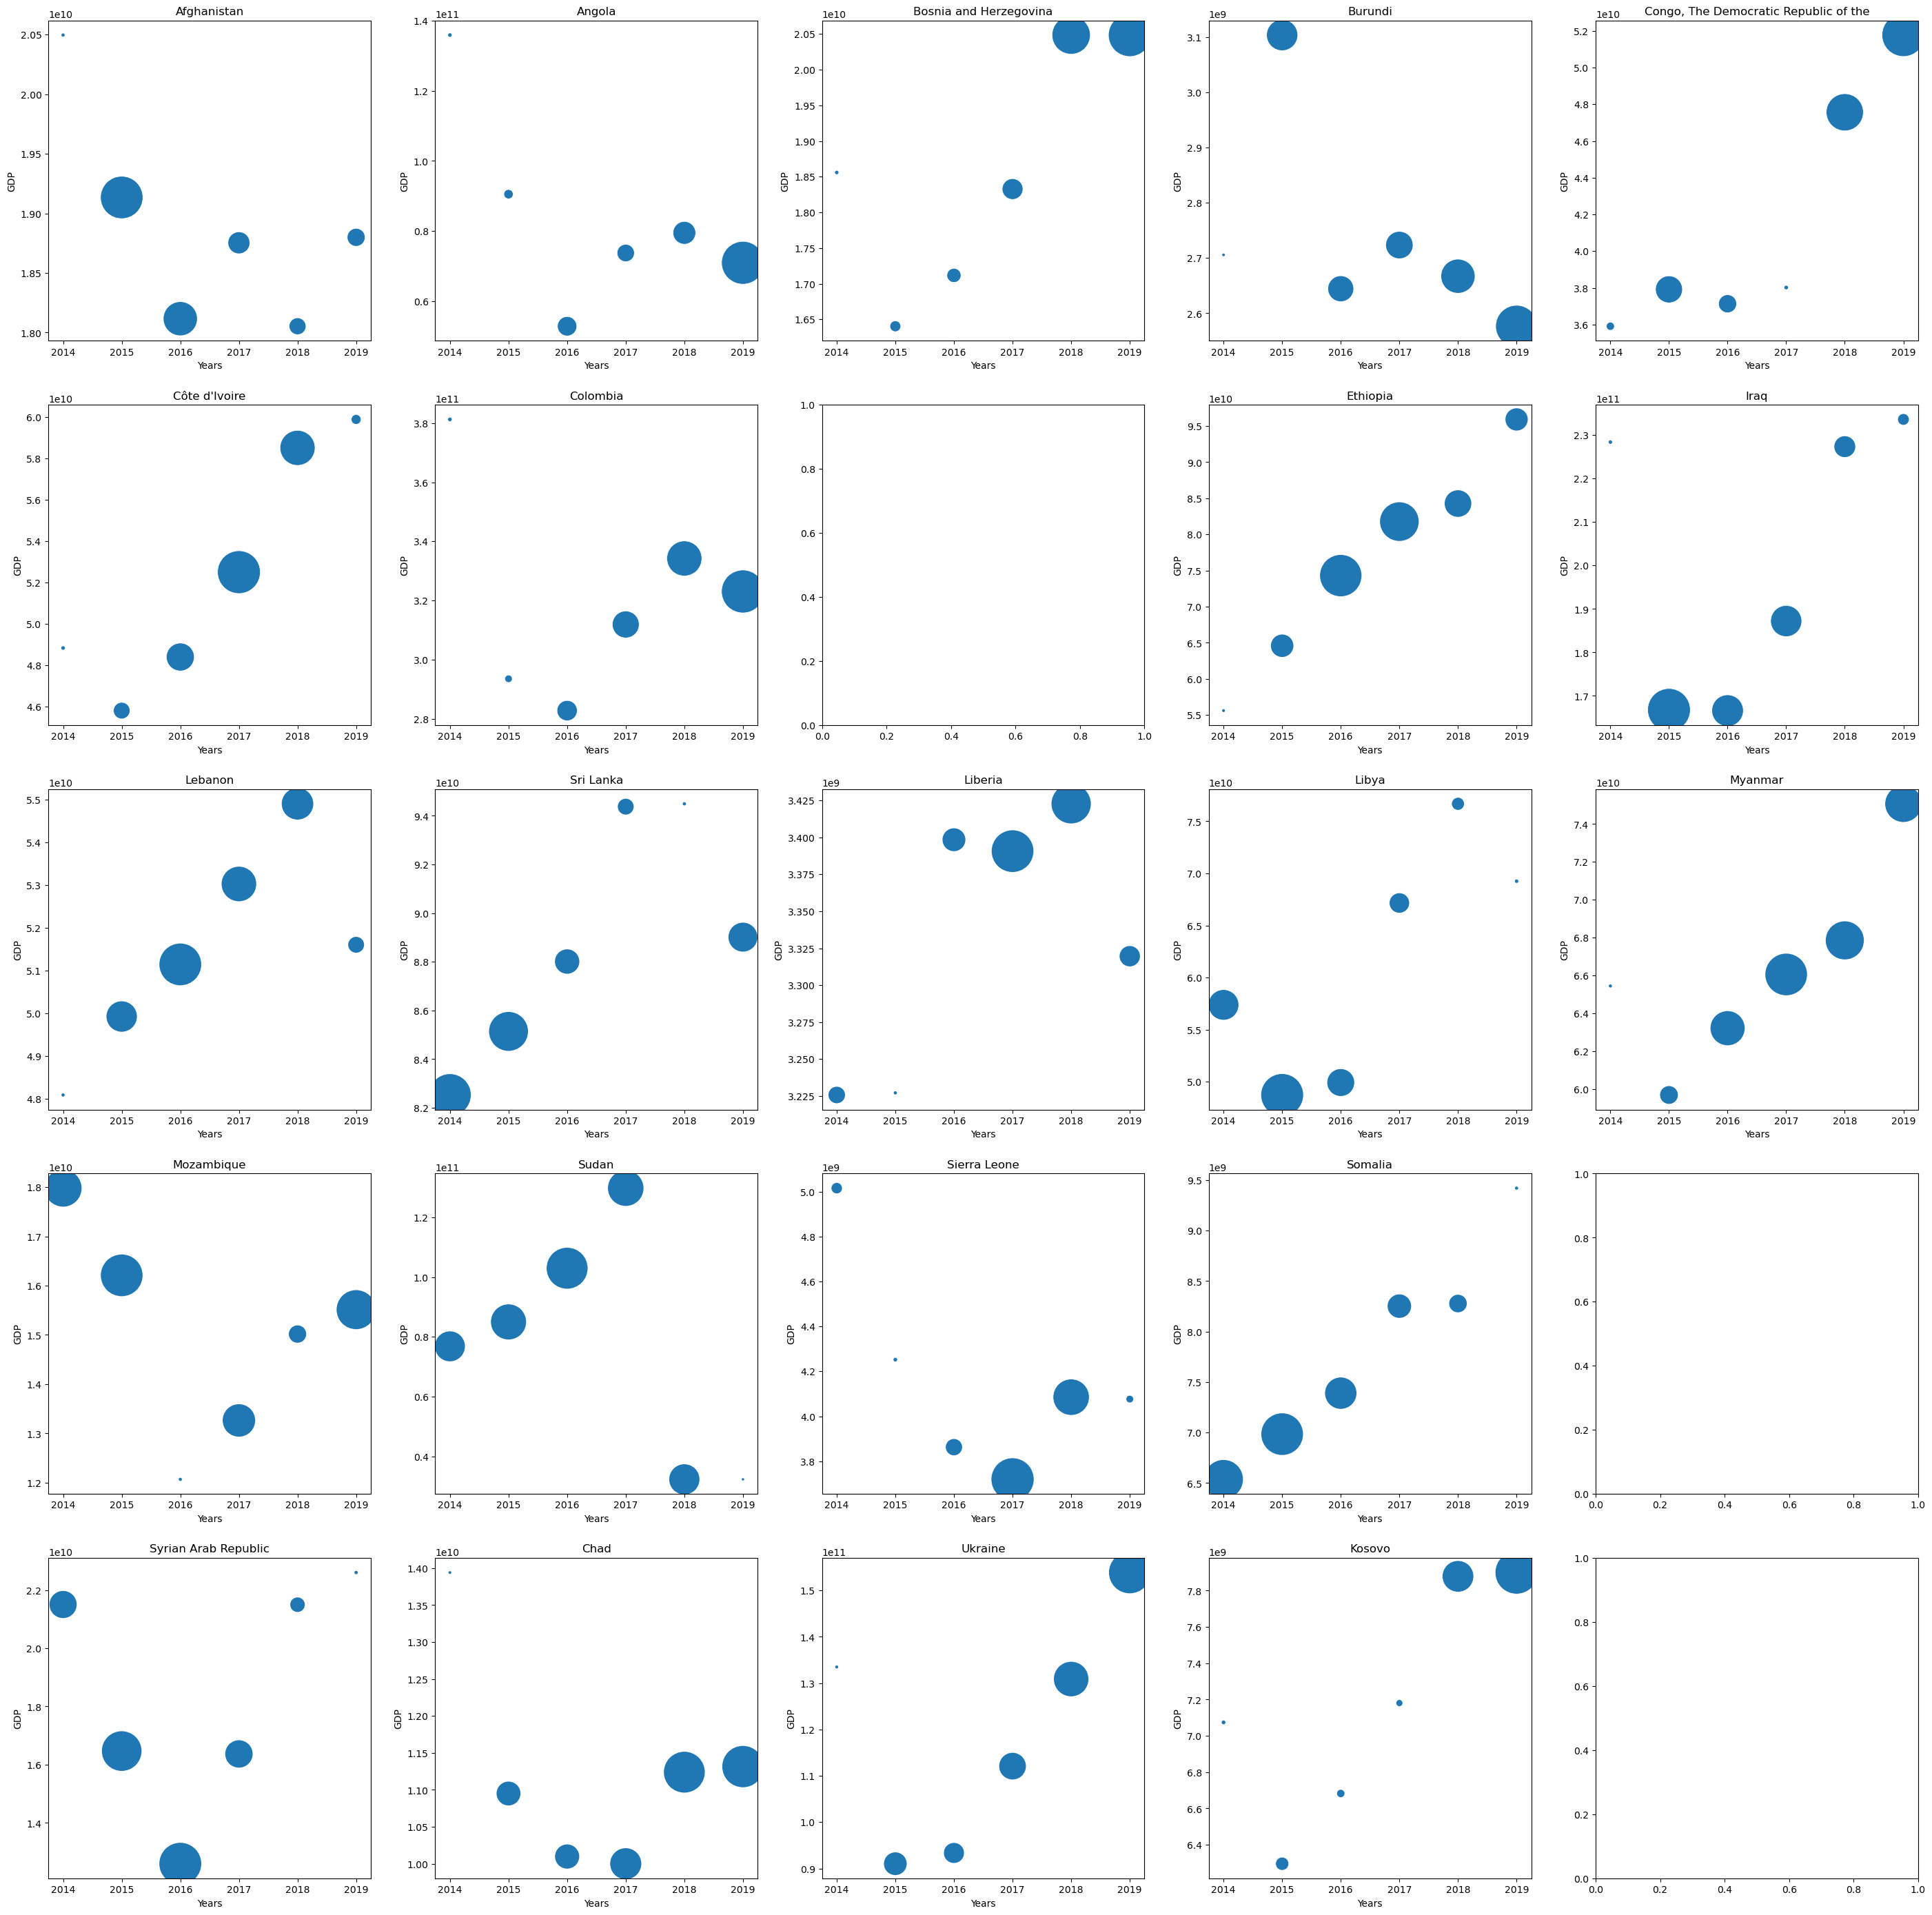

In [65]:
GDP=  countries_of_interest_df
#seperate columns for total of resident and citizen emmigrants
GDP ['Estst_Total_migrant_2014'] = GDP['ESTAT_2014_T_T_cit']+GDP['ESTAT_2014_T_T_res']
GDP ['Estst_Total_migrant_2015'] = GDP['ESTAT_2015_T_T_cit']+GDP['ESTAT_2015_T_T_res']
GDP ['Estst_Total_migrant_2016'] = GDP['ESTAT_2016_T_T_cit']+GDP['ESTAT_2016_T_T_res']
GDP ['Estst_Total_migrant_2017'] = GDP['ESTAT_2017_T_T_cit']+GDP['ESTAT_2017_T_T_res']
GDP ['Estst_Total_migrant_2018'] = GDP['ESTAT_2018_T_T_cit']+GDP['ESTAT_2018_T_T_res']
GDP ['Estst_Total_migrant_2019'] = GDP['ESTAT_2019_T_T_cit']+GDP['ESTAT_2019_T_T_res']
gdp_group = GDP.groupby(['origin_name','origin_gdp_2014','origin_gdp_2015','origin_gdp_2016','origin_gdp_2017','origin_gdp_2018','origin_gdp_2019'])
group_cit_gdp = gdp_group.agg({'Estst_Total_migrant_2014': np.sum,
                               'Estst_Total_migrant_2015': np.sum,
                                   'Estst_Total_migrant_2016': np.sum,
                                   'Estst_Total_migrant_2017': np.sum,
                                   'Estst_Total_migrant_2018': np.sum,
                                   'Estst_Total_migrant_2019': np.sum})

group_cit_gdp
group_cit_gdp = pd.DataFrame(group_cit_gdp)
group_cit_gdp=group_cit_gdp.reset_index()

#columns for x axis values
X = ['Estst_Total_migrant_2014','Estst_Total_migrant_2015','Estst_Total_migrant_2016',
                                   'Estst_Total_migrant_2017',
                                   'Estst_Total_migrant_2018',
                                   'Estst_Total_migrant_2019']
#columns for y axis values
Y = ['origin_gdp_2014','origin_gdp_2015','origin_gdp_2016','origin_gdp_2017','origin_gdp_2018','origin_gdp_2019']


empty = ['Eritrea','South Sudan', 'Yemen'] #countries whos gdp is missing in the data
fig,ax = plt.subplots(5,5, figsize=(35,35))



x=['2014','2015','2016','2017','2018','2019']
for i in range(0,5):
    for j in range(0,5):
        population=[]
        gdp=[]
        
        if country_names[i][j] not in empty:
            for E in X:

                #creating seperate list for columns values using the X list column names
                population.append(group_cit_gdp[group_cit_gdp['origin_name']==country_names[i][j]][E].item())
            for G in Y:
                #creating seperate list for gdp values using the Y list column names
                gdp.append(group_cit_gdp[group_cit_gdp['origin_name']==country_names[i][j]][G].item())
            sns.scatterplot(x=x, y=gdp, size=population, legend=False, sizes=(20, 2000), ax=ax[i][j]).set_title(country_names[i][j])
            ax[i][j].set_xlabel("Years")
            ax[i][j].set_ylabel("GDP")
            
            







Destination Countries from 2014-2019

C:\Users\TameemTecnology\AppData\Local\Temp\ipykernel_13596\525653424.py:2: FutureWarning:

The provided callable <function sum at 0x000001E46ED28C20> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.

C:\Users\TameemTecnology\AppData\Local\Temp\ipykernel_13596\525653424.py:2: FutureWarning:

The provided callable <function sum at 0x000001E46ED28C20> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.



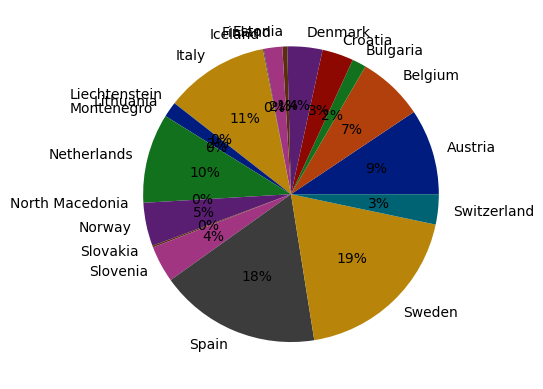

In [66]:
#grouping by destination name and gdp
destination_group = GDP.groupby(['destination_name','destination_gdp_2014','destination_gdp_2015','destination_gdp_2016','destination_gdp_2017','destination_gdp_2018','destination_gdp_2019']).agg({'Estst_Total_migrant_2014': np.sum,
                               'Estst_Total_migrant_2015': np.sum,
                                   'Estst_Total_migrant_2016': np.sum,
                                   'Estst_Total_migrant_2017': np.sum,
                                   'Estst_Total_migrant_2018': np.sum,
                                   'Estst_Total_migrant_2019': np.sum})
#replacing the 0.0 values with nan to drop the rows where all the values are nan i.e. countries with no immigrants
destination_group = destination_group.replace(0.0, np.nan)
#dropping nan rows
destination_group = destination_group.dropna(axis = 0, how = 'all')
#converting the grouped data to Dataframe 
destination_group = pd.DataFrame(destination_group).reset_index()

#adding a new column with total number of immigrants in sum years
destination_group['Total_6_years'] = destination_group['Estst_Total_migrant_2014']+ destination_group['Estst_Total_migrant_2015']+destination_group['Estst_Total_migrant_2016']+destination_group['Estst_Total_migrant_2017']+destination_group['Estst_Total_migrant_2018']+destination_group['Estst_Total_migrant_2019']
#converting nan to zeros for calculations
destination_group = destination_group.replace(np.nan,0)

palette_color = sns.color_palette('dark')

plt.pie(destination_group['Total_6_years'].to_list(), labels=destination_group['destination_name'].to_list(), colors=palette_color, autopct='%.0f%%') 

plt.show()  


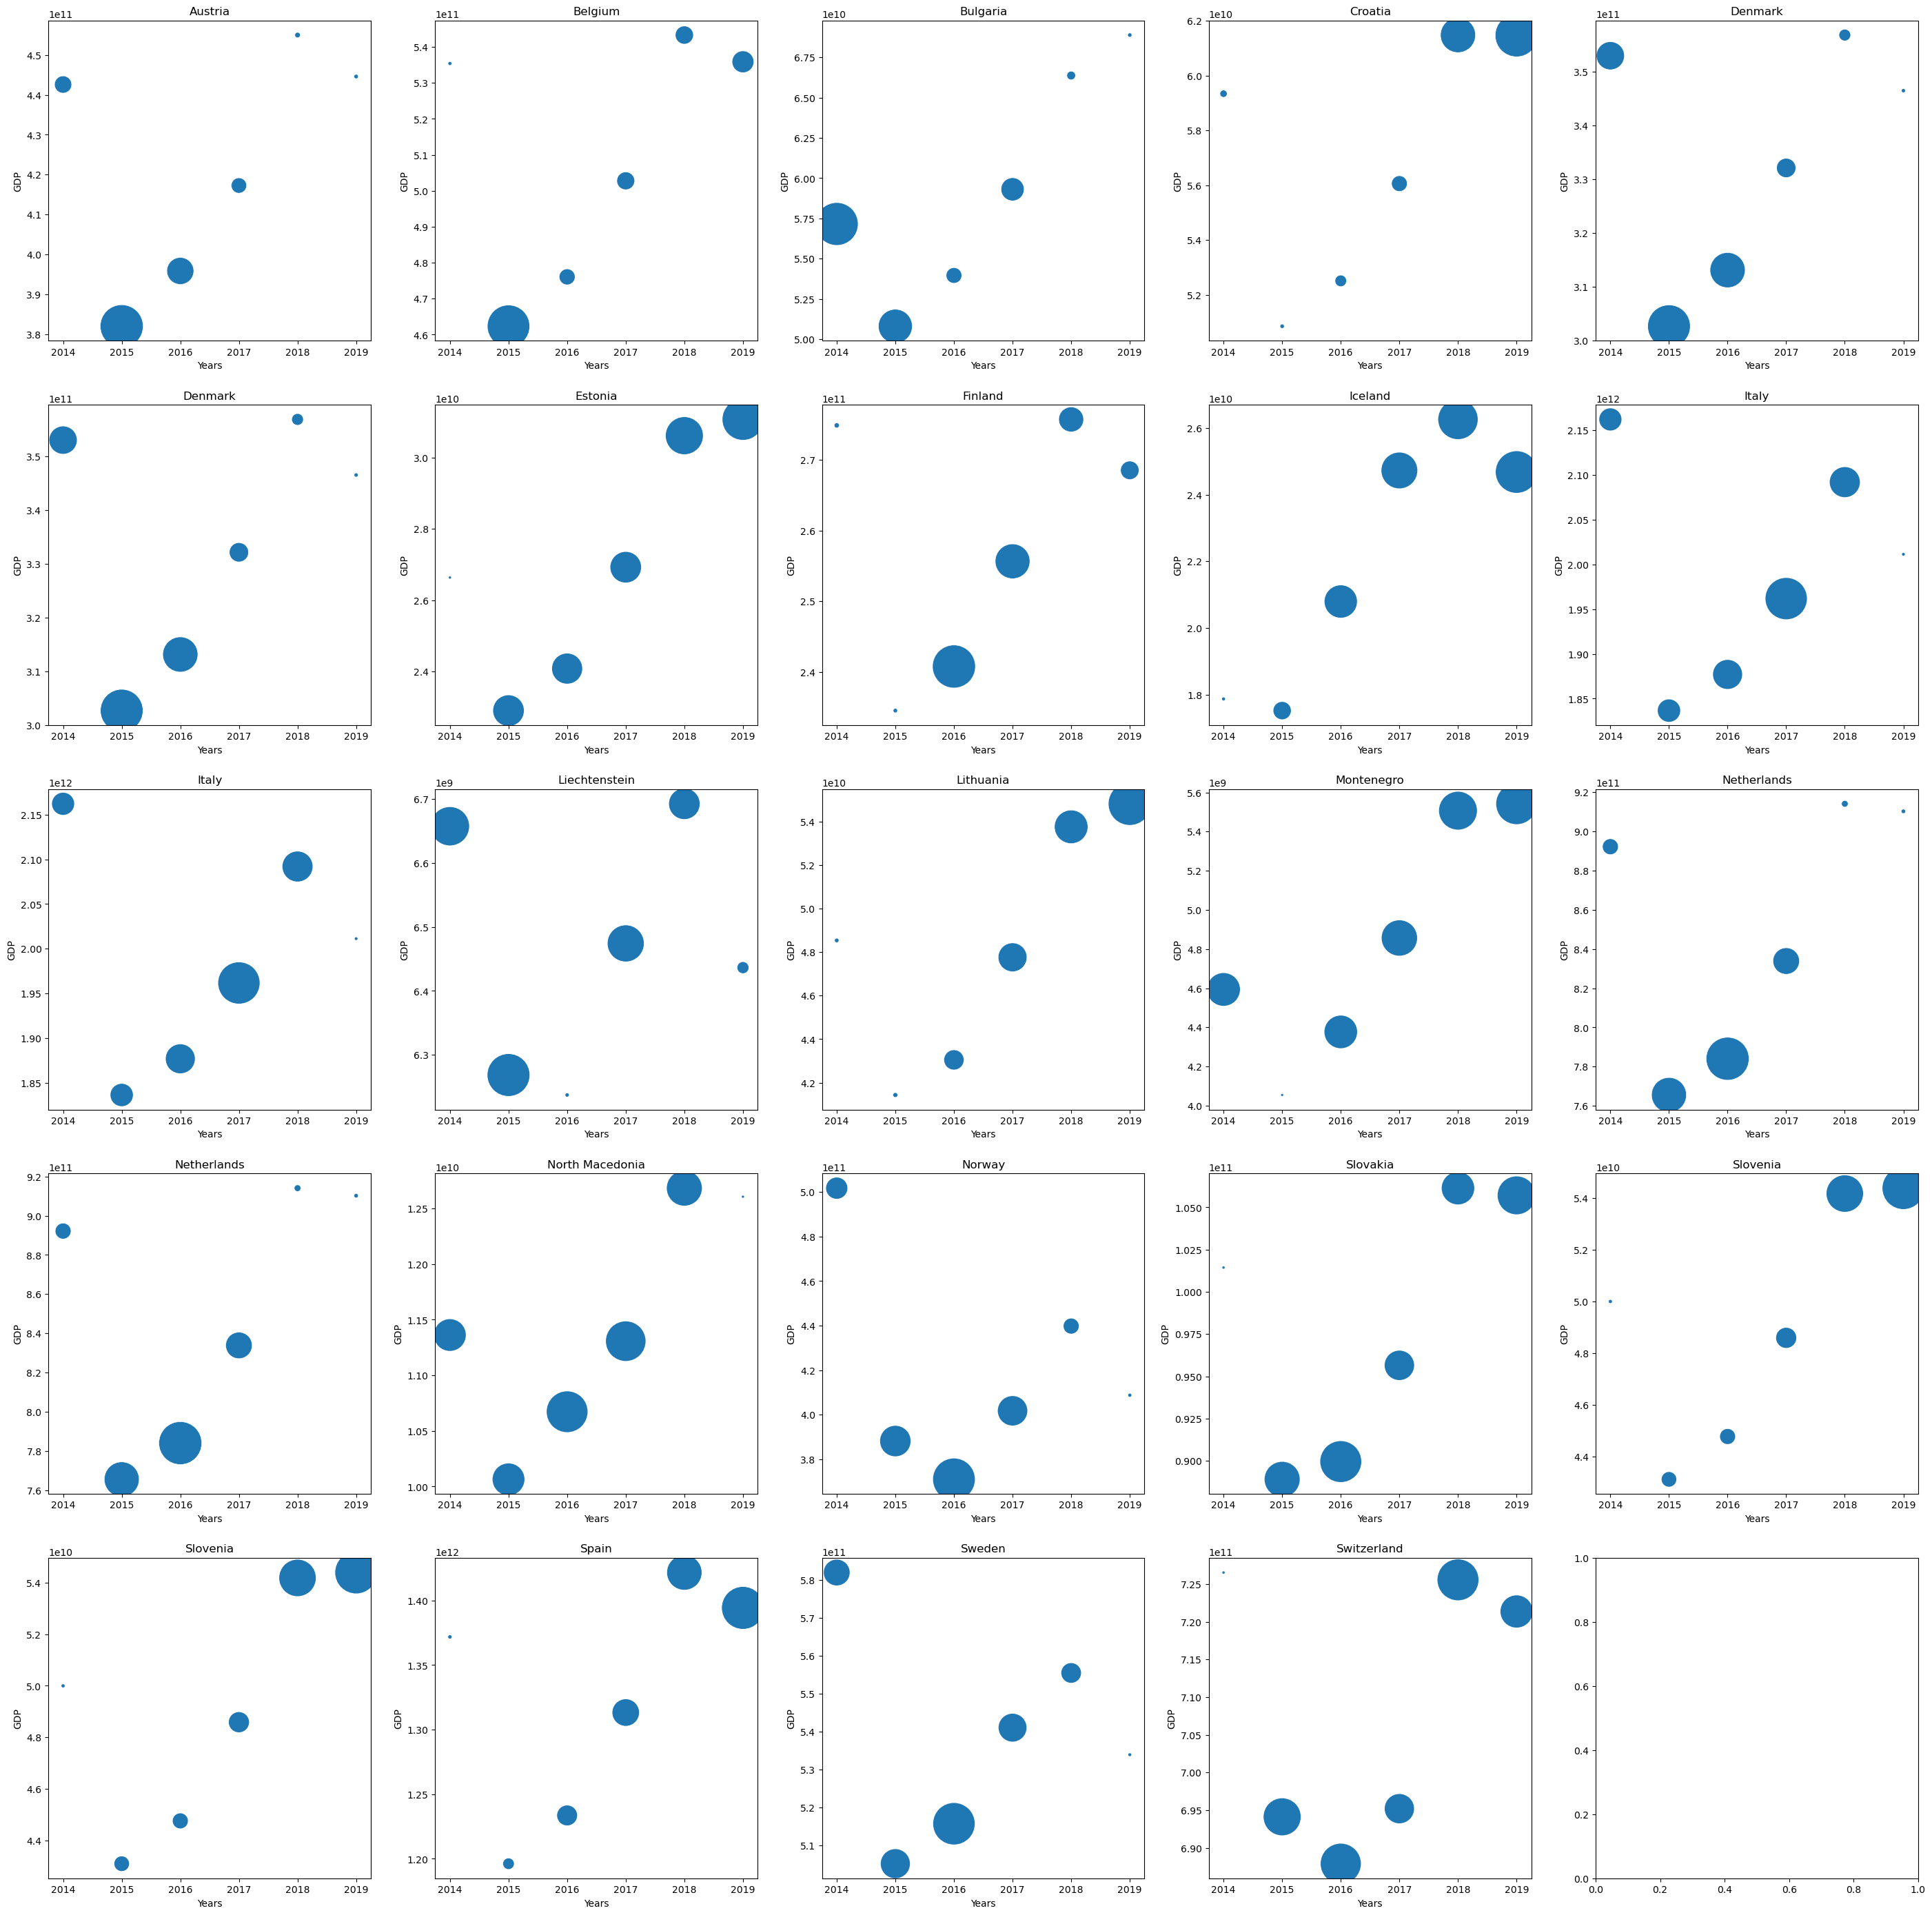

In [67]:
destination_countries = destination_group['destination_name'].to_list()
#dividing list into sublists for subplots
destination_countries = [destination_countries[i:i+5] for i in range(0, len(destination_countries), 4)]
destination_countries
fig,ax = plt.subplots(5,5, figsize=(35,35))
#COlumns names for population data
X = ['Estst_Total_migrant_2014','Estst_Total_migrant_2015','Estst_Total_migrant_2016',
                                   'Estst_Total_migrant_2017',
                                   'Estst_Total_migrant_2018',
                                   'Estst_Total_migrant_2019']
#columns for y axis values
Y = ['destination_gdp_2014','destination_gdp_2015','destination_gdp_2016','destination_gdp_2017','destination_gdp_2018','destination_gdp_2019']
#x-axis labels
x=['2014','2015','2016','2017','2018','2019']
for i in range(0,5):
    for j in range(0,5):
        #the last sub list has length of 4, so to avaid index error will break the loop when j > length 
        if j>=len(destination_countries[i]):
            break
        population=[]
        gdp=[]
        
        
        for E in X:
            #creating seperate list for columns values using the X list column names
            population.append(destination_group[destination_group['destination_name']==destination_countries[i][j]][E].item())
        for G in Y:
            #creating seperate list for gdp values using the Y list column names
            gdp.append(destination_group[destination_group['destination_name']==destination_countries[i][j]][G].item())
        sns.scatterplot(x=x, y=gdp, size=population, legend=False, sizes=(20, 2000), ax=ax[i][j]).set_title(destination_countries[i][j])
        ax[i][j].set_xlabel("Years")
        ax[i][j].set_ylabel("GDP")


            